Explore `pandas`. Specifically explore the possibility of using it to store results for a run of conditional generation.

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import autograd.numpy as np
import scipy.stats as stats
import torch
import tensorflow as tf

In [202]:
import kbrgan
import kbrgan.glo as glo
import kbrgan.imutil as imutil
import kbrgan.util as util

## Load an image

In [182]:
log_dir = '../kbrgan/ex/log_lars_celeba_vggface'
df = util.get_df_from_logs(log_dir)

## Display images in a dataframe

In [204]:
# https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
import base64
import io
import PIL
import IPython
import skimage

# def get_thumbnail(path):
#     im = PIL.Image.open(path)
#     im.thumbnail((150, 150), Image.LANCZOS)
#     return im

def image_base64(im, resize=128):
    '''
    im: a numpy array whose range is [0,1]
    '''
    with io.BytesIO() as buffer:
        # resize
        im = skimage.transform.resize(im, (resize, resize), mode='reflect', anti_aliasing=True)
        
        # convert the numpy array to a PIL image
        pil_im = PIL.Image.fromarray(np.uint8(im*255))
        pil_im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def images_formatter(imgs,col=3):
    html = u''
    for i in range(len(imgs)):
        html += '<div class="imgs" style="display: inline-block">'
        img64 = image_base64(imgs[i])
#         print(img64)
        img_tag = '<img src="data:image/jpeg;base64,{}" >'.format(img64)
#         img_tag = f'<img src="data:image/jpeg;base64,{img64}">'
        html += img_tag + ' </div> '
    
        if (i+1)%col == 0:
            html += '<br>'
#     print(html)
    return html 

In [205]:
df.columns.values

array(['cond_imgs', 'cond_path', 'depth_process', 'device',
       'extractor_layers', 'extractor_type', 'g_max', 'g_min', 'g_path',
       'g_type', 'img_log_steps', 'img_size', 'ini_imgs', 'kernel',
       'kparams', 'logdir', 'lr', 'n_opt_iter', 'n_sample', 'out_imgs',
       'seed', 'texture', 'w_input', 'zpen'], dtype=object)

In [206]:
#do some filtering based on parameters etc.
df_final = df[['cond_imgs','out_imgs','lr','extractor_type','extractor_layers']] #pick what we want to display

,cond_imgs,out_imgs,lr,extractor_type,extractor_layers
0,,,0.1,vgg_face,"['26', '35']"
1,,,0.001,vgg_face,"['26', '35']"
2,,,0.1,vgg_face,"['17', '26', '35']"
3,,,0.01,vgg_face,['17']
4,,,0.1,vgg_face,['35']
5,,,0.01,vgg_face,"['17', '26']"
6,,,1e-05,vgg_face,"['26', '35']"
7,,,0.1,vgg_face,"['17', '26']"
8,,,0.1,vgg_face,['17']

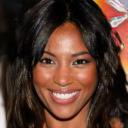
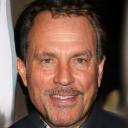
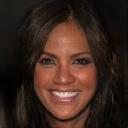
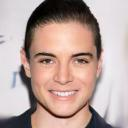
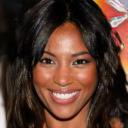
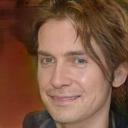
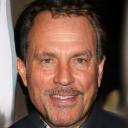
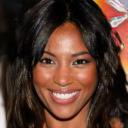
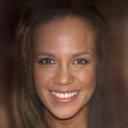
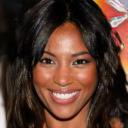
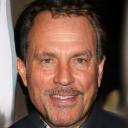
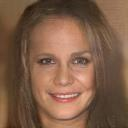
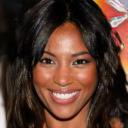
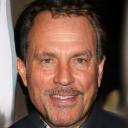
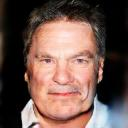
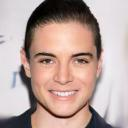
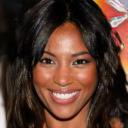
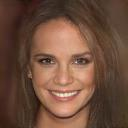
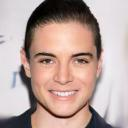
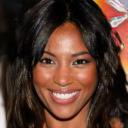
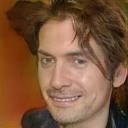
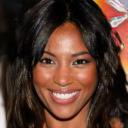
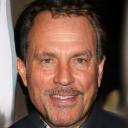
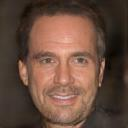
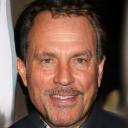
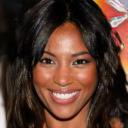
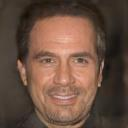

In [207]:
# dataframe to html
pd.set_option('display.max_colwidth', -1)
html = df_final.to_html(formatters={'cond_imgs': images_formatter, 'out_imgs': images_formatter}, escape=False)
IPython.display.HTML(html)

In [181]:
len(html)

185346